# Net-to-gross

Data from HYSS for Kish Basin (<https://hyss.ie/>)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import os

In [2]:
data = pd.DataFrame(
    {
        "gross": [190, 201, 219, 144, 278, 271, 120],
        "NTG": [0.68, 0.34, 0.39, 0.41, 0.41, 0.51, 0.36],
        "well": [
            "33/21-1",
            "33/21-1",
            "33/21-1",
            "33/21-1",
            "33/17-2A",
            "33/17-2A",
            "33/17-1",
        ],
        "halite": [
            "Preesall",
            "Mythop",
            "Rossall",
            "Fylde",
            "Rossall",
            "Fylde",
            "Fylde",
        ],
    }
)

In [3]:
data.sort_values(by=["gross", "NTG"], inplace=True)

In [4]:
data

,gross,NTG,well,halite
6,120,0.36,33/17-1,Fylde
3,144,0.41,33/21-1,Fylde
0,190,0.68,33/21-1,Preesall
1,201,0.34,33/21-1,Mythop
2,219,0.39,33/21-1,Rossall
5,271,0.51,33/17-2A,Fylde
4,278,0.41,33/17-2A,Rossall


In [5]:
model = sm.OLS(data["NTG"], sm.add_constant(data["gross"]))
results = model.fit()

In [6]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    NTG   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.165
Method:                 Least Squares   F-statistic:                    0.1524
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.712
Time:                        21:14:11   Log-Likelihood:                 5.6884
No. Observations:                   7   AIC:                            -7.377
Df Residuals:                       5   BIC:                            -7.485
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3734      0.184      2.025      0.0

/run/media/nms/Backup/Documents/Git/wind-to-hydrogen-toolkit/hydrogen-salt-storage/.venv/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [7]:
b, m = results.params
r = results.rsquared

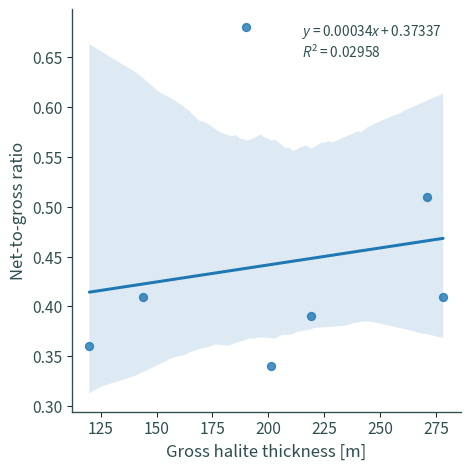

In [8]:
g = sns.lmplot(data=data, x="gross", y="NTG")
plt.text(215, 0.65, f"$y = {m:.5f}x {b:+.5f}$\n$R^2 = {r:.5f}$", fontsize=11.5)
g.set_axis_labels("Gross halite thickness [m]", "Net-to-gross ratio")
plt.show()

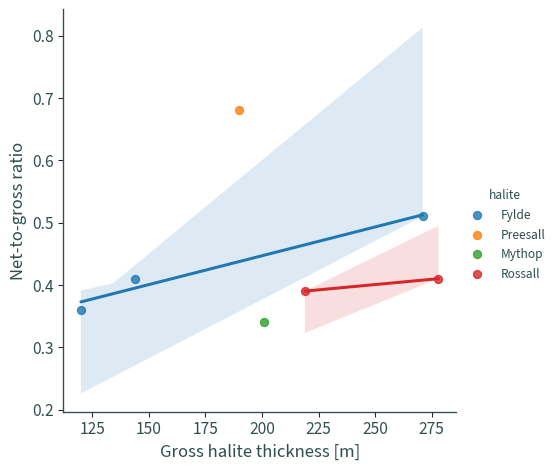

In [9]:
g = sns.lmplot(data=data, x="gross", y="NTG", hue="halite")
# g.set(xlim=(0, 500), ylim=(0, 1))
g.set_axis_labels("Gross halite thickness [m]", "Net-to-gross ratio")
plt.show()

In [10]:
data.describe()

,gross,NTG
count,7.000000,7.000000
mean,203.285714,0.442857
std,59.227568,0.117716
min,120.000000,0.340000
25%,167.000000,0.375000
50%,201.000000,0.410000
75%,245.000000,0.460000
max,278.000000,0.680000


## Fylde only

In [11]:
fylde = data[data["halite"] == "Fylde"]

In [12]:
model = sm.OLS(fylde["NTG"], sm.add_constant(fylde["gross"]))
results = model.fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    NTG   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     28.54
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.118
Time:                        21:14:13   Log-Likelihood:                 9.1463
No. Observations:                   3   AIC:                            -14.29
Df Residuals:                       1   BIC:                            -16.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2617      0.033      7.943      0.0

/run/media/nms/Backup/Documents/Git/wind-to-hydrogen-toolkit/hydrogen-salt-storage/.venv/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [14]:
b, m = results.params
r = results.rsquared

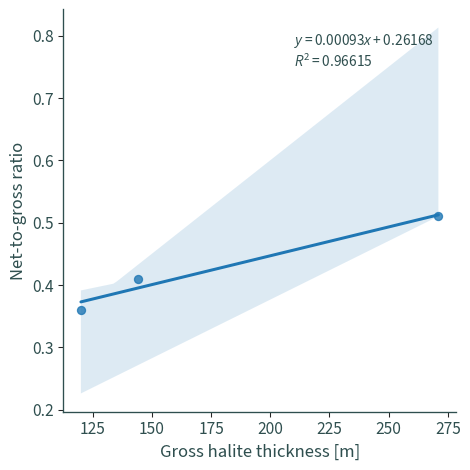

In [15]:
g = sns.lmplot(data=fylde, x="gross", y="NTG")
plt.text(210, 0.75, f"$y = {m:.5f}x {b:+.5f}$\n$R^2 = {r:.5f}$", fontsize=11.5)
g.set_axis_labels("Gross halite thickness [m]", "Net-to-gross ratio")
plt.show()

In [16]:
data.describe()

,gross,NTG
count,7.000000,7.000000
mean,203.285714,0.442857
std,59.227568,0.117716
min,120.000000,0.340000
25%,167.000000,0.375000
50%,201.000000,0.410000
75%,245.000000,0.460000
max,278.000000,0.680000


## Linear regression

In [17]:
def net_to_gross(gross):
    y = m * gross + b
    if y < 0:
        y = max(0, y)
    elif y > 0.75:
        y = min(0.75, y)
    return y

In [24]:
ntg = []
gross = np.arange(0, 700, step=1)

In [25]:
for x in gross:
    ntg.append(net_to_gross(x))

In [26]:
df = pd.DataFrame({"gross": gross, "NTG": ntg})

In [27]:
df.describe()

,gross,NTG
count,700.00000,700.000000
mean,349.50000,0.565548
std,202.21688,0.161616
min,0.00000,0.261677
25%,174.75000,0.423351
50%,349.50000,0.585026
75%,524.25000,0.746700
max,699.00000,0.750000


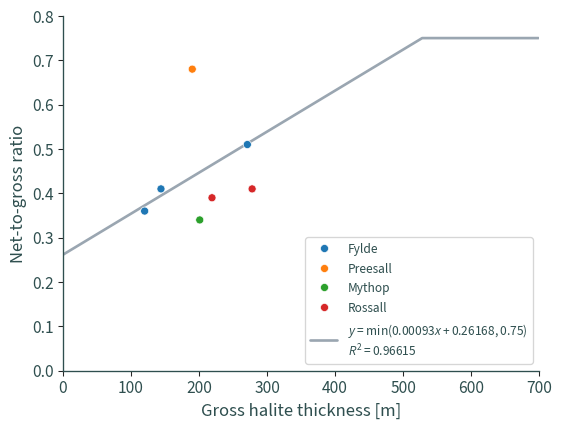

In [28]:
ax = sns.scatterplot(data=data, x="gross", y="NTG", hue="halite", zorder=3)
df.plot(x="gross", y="NTG", zorder=1, color="slategrey", label=f"$y = \min({m:.5f}x {b:+.5f}, 0.75)$\n$R^2 = {r:.5f}$", linewidth=2, alpha=.7, ax=ax)
ax.set_xlabel("Gross halite thickness [m]")
ax.set_ylabel("Net-to-gross ratio")
sns.despine()
ax.set(xlim=(0, 700), ylim=(0, .8))
plt.legend(title=None)
plt.savefig(
    os.path.join("graphics", f"fig_net_to_gross.jpg"),
    format="jpg",
    dpi=600,
)
plt.show()

In [29]:
net_to_gross(1000)

0.75

In [30]:
print(f"{net_to_gross(300):.5f}")

0.53923
